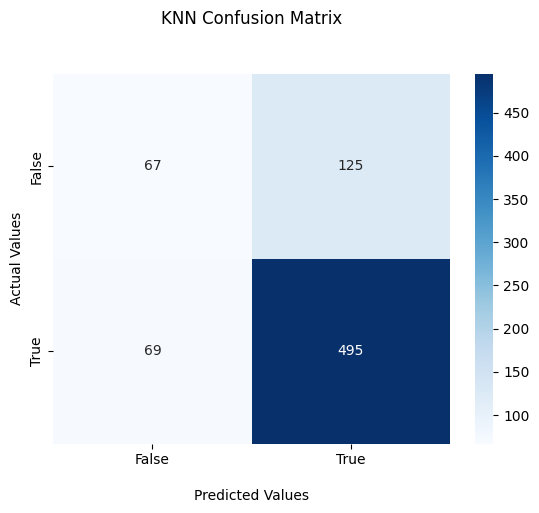

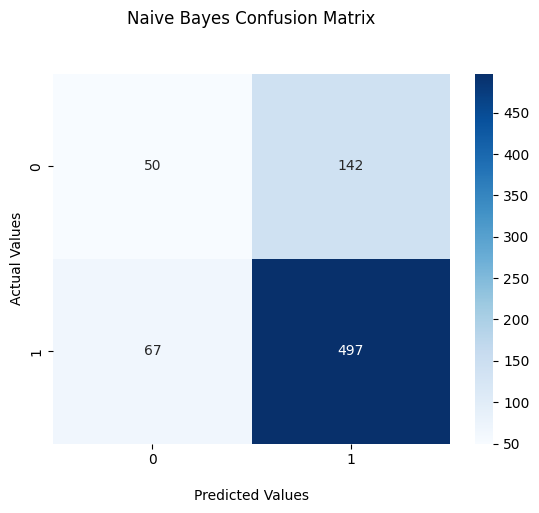

KNN accuracies:  [0.6973684210526315, 0.75, 0.8026315789473685, 0.7368421052631579, 0.7236842105263158, 0.6842105263157895, 0.6933333333333334, 0.72, 0.7333333333333333, 0.6933333333333334]
NB accuracies:  [0.7105263157894737, 0.7368421052631579, 0.75, 0.8157894736842105, 0.7763157894736842, 0.6578947368421053, 0.76, 0.72, 0.76, 0.7466666666666667]
KNN > NB, p-value = 0.9104476998751558


In [17]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import mutual_info_classif, SelectKBest
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics, datasets
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats


data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

classNames = ['class']
accuraciesKNN = []
accuraciesNB = []



def modelEvaluation(X, y):

    folds = StratifiedKFold(n_splits=10, random_state = 0, shuffle = True)

    KNN_confMatrix = np.zeros((2, 2))
    NB_confMatrix = np.zeros((2, 2))
    emptyMatrices = True

    KNNPredictor = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', weights = 'uniform')
    NBPredictor = GaussianNB()

    splitFolds = folds.split(X, y)

    # iterate per fold
    for train_k, test_k in splitFolds:

        X_train, X_test = X.iloc[train_k], X.iloc[test_k]
        y_train, y_test = y.iloc[train_k], y.iloc[test_k]
        
        KNNPredictor.fit(X_train, y_train)
        y_KNNPred = KNNPredictor.predict(X_test)
        KNN_auxConfMatrix = confusion_matrix(y_test, y_KNNPred)
        if emptyMatrices:

            KNN_confMatrix = KNN_auxConfMatrix

        else:

            KNN_confMatrix += KNN_auxConfMatrix

        accuraciesKNN.append(metrics.accuracy_score(y_test, y_KNNPred))
        

        NBPredictor.fit(X_train, y_train)
        y_NBPred = NBPredictor.predict(X_test)
        NB_auxConfMatrix = confusion_matrix(y_test, y_NBPred)

        if emptyMatrices:

            NB_confMatrix = NB_auxConfMatrix

        else:

            NB_confMatrix += NB_auxConfMatrix

        emptyMatrices = False
        accuraciesNB.append(metrics.accuracy_score(y_test, y_NBPred))

    return NB_confMatrix, KNN_confMatrix
    

def plot_confusion_matrixes(KNN_confMatrix, NB_confMatrix):

    ax1 = sns.heatmap(KNN_confMatrix, annot = True, fmt = "d", cmap = 'Blues')

    ax1.set_title('KNN Confusion Matrix\n\n');
    ax1.set_xlabel('\nPredicted Values')
    ax1.set_ylabel('Actual Values');


    ax1.xaxis.set_ticklabels(['False','True'])
    ax1.yaxis.set_ticklabels(['False','True'])

    plt.show()

    ax2 = sns.heatmap(NB_confMatrix, annot = True, fmt = "d", cmap = 'Blues')

    ax2.set_title('Naive Bayes Confusion Matrix\n\n');
    ax2.set_xlabel('\nPredicted Values')
    ax2.set_ylabel('Actual Values');

    plt.show()

def testHypothesis(accuraciesKNN, accuraciesNB):

    print("KNN accuracies: ", accuraciesKNN)
    print("NB accuracies: ", accuraciesNB)

    res = stats.ttest_rel(accuraciesKNN, accuraciesNB, alternative = "greater")

    print("KNN > NB, p-value =", res.pvalue)


KNN_confMatrix, NB_confMatrix = modelEvaluation(X, y)
plot_confusion_matrixes(KNN_confMatrix, NB_confMatrix)
testHypothesis(accuraciesKNN, accuraciesNB)
